# Constraint plots

## Preliminaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import norm

sns.set_context("talk")

## Load data

In [3]:
df = pd.read_csv("../outputs/expected_variants_all_regions_no_cpg_stats.tsv", sep="\t")

## Expected variants per transcript

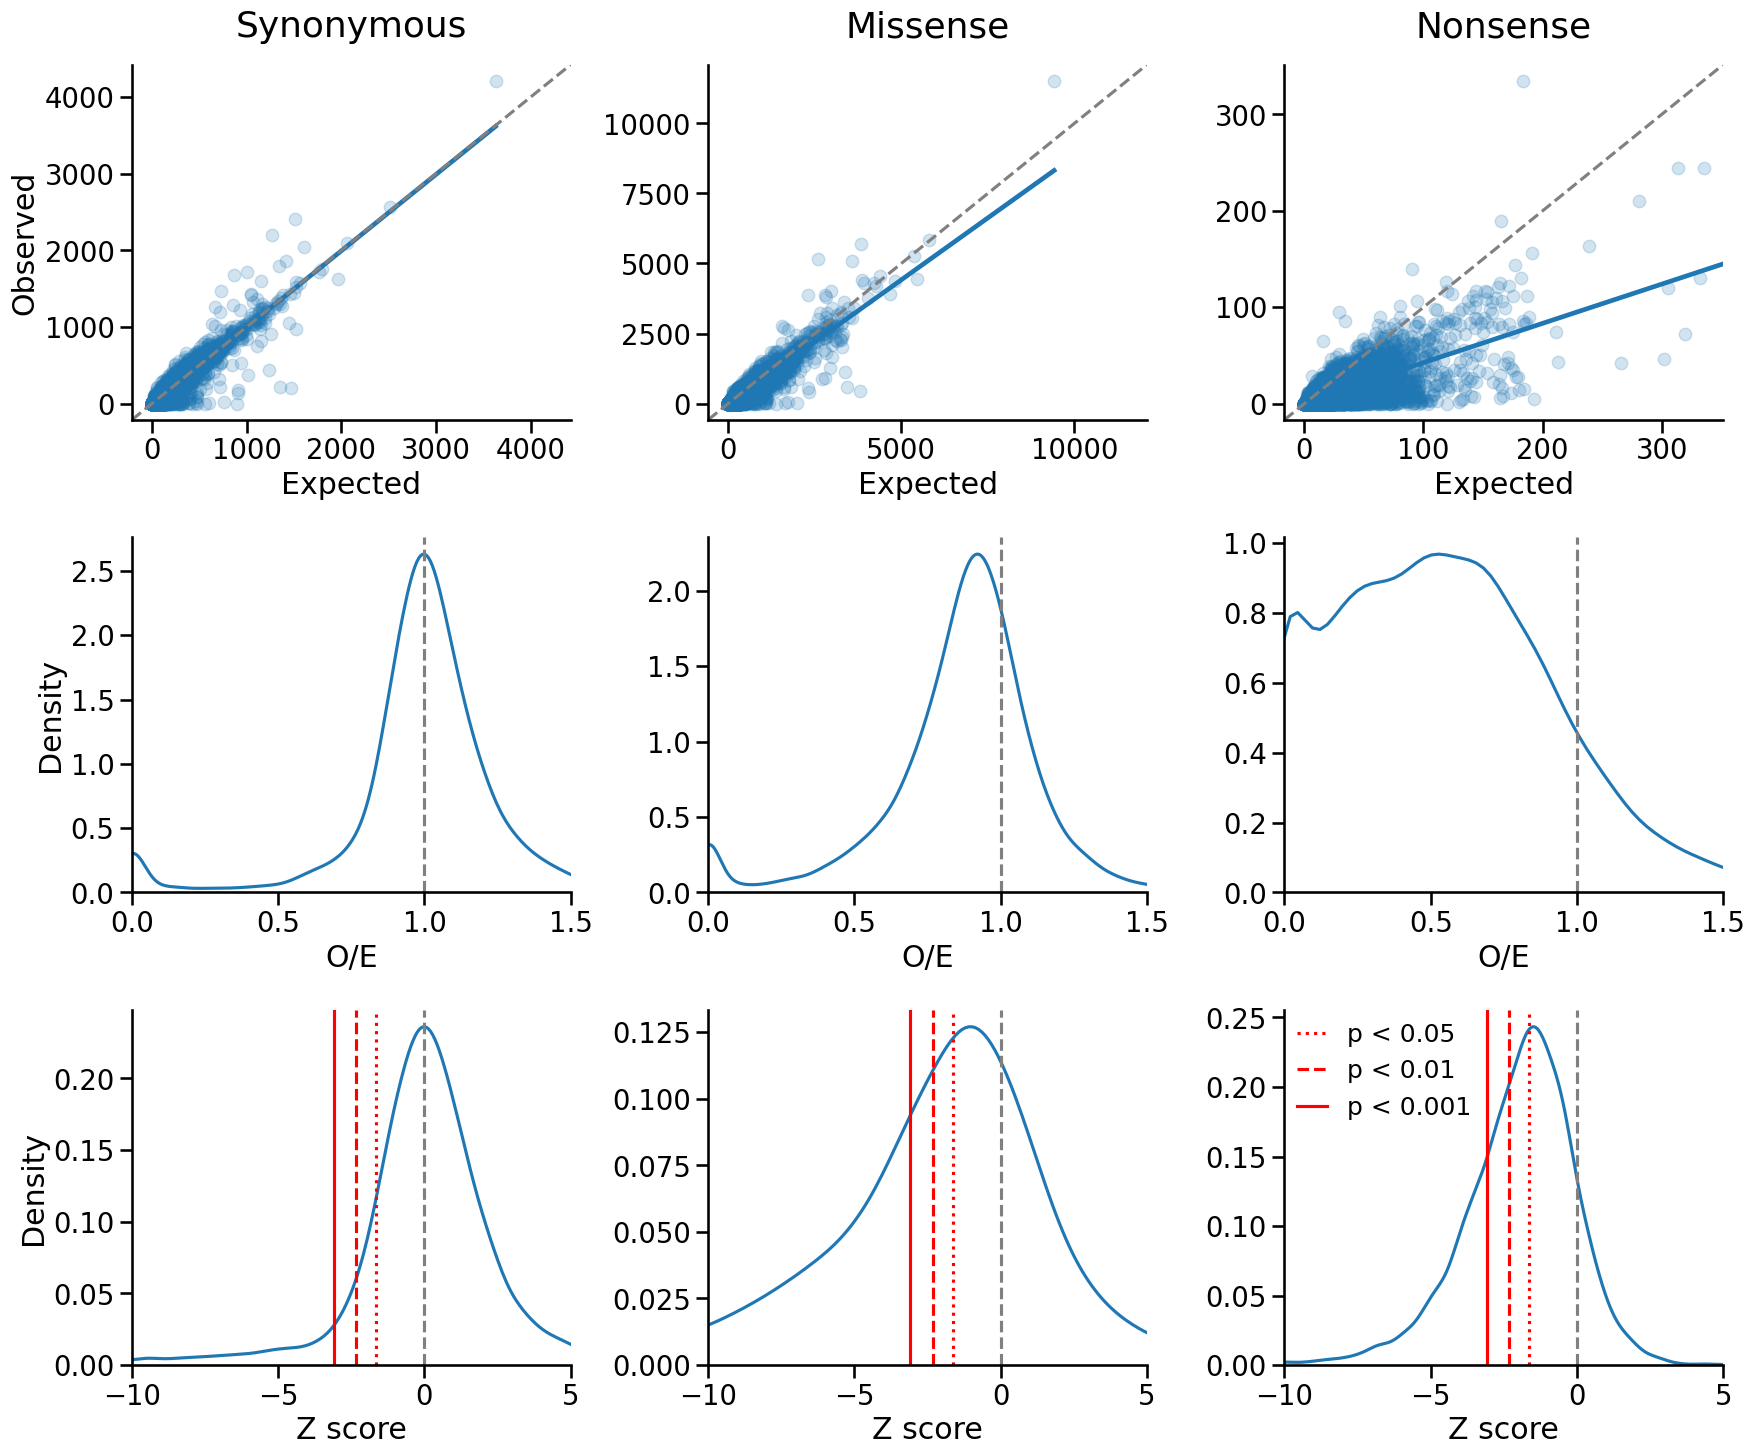

In [5]:
sns.set_context("talk", font_scale=1.2)

csq = ["synonymous", "missense", "nonsense"]

fig, axs = plt.subplots(3, 3, figsize=(18, 15), layout="tight")

# Expected variants per transcript
for c, (i, ax) in zip(csq, enumerate(axs[0])):
    sns.regplot(
        ax=ax,
        data=df[
            (df["region"] == "transcript")
            & (df.enst != "ENST00000589042")  # Exclude TTN
            & (df["csq"] == c)
        ],
        x="n_exp",
        y="n_obs",
        ci=None,
        scatter_kws=dict(alpha=0.2),
    )

    ax.axline((0, 0), (1, 1), color="grey", linestyle="--")
    ax.set_title(c.capitalize(), pad=20, fontsize="large")
    ax.set_xlabel("Expected")
    ax.set_xlim(ax.get_ylim())
    if i == 0:
        ax.set_ylabel("Observed")
    else:
        ax.set_ylabel(None)

# O/E per transcript
for c, (i, ax) in zip(csq, enumerate(axs[1])):
    sns.kdeplot(
        ax=ax,
        data=df[(df["region"] == "transcript") & (df["csq"] == c)],
        x="oe",
        gridsize=1000,
    )
    ax.set_xlabel("O/E")
    ax.set_xlim((0, 1.5))
    ax.axvline(
        x=1,
        color="gray",
        linestyle="--",
    )
    if i == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel(None)

# Z scores per transcript
for c, (i, ax) in zip(csq, enumerate(axs[2])):
    sns.kdeplot(
        ax=ax,
        data=df[(df["region"] == "transcript") & (df["csq"] == c)],
        x="z",
        gridsize=1000,
    )
    ax.set_xlabel("Z score")
    ax.set_xlim((-10, 5))
    ax.axvline(
        x=0,
        color="gray",
        linestyle="--",
    )
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")
    if i == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel(None)
    if i == 2:
        ax.legend(
            frameon=False,
            borderpad=0,
            handlelength=1.2,
            fontsize="small",
        )

# Figure level changes
for ax in axs:
    for a in ax:
        a.spines["top"].set_color("None")
        a.spines["right"].set_color("None")

plt.savefig("../plots/constraint_in_transcripts_by_csq_combined.svg", format="svg")
plt.savefig(
    "../plots/constraint_in_transcripts_by_csq_combined.png", format="png", dpi=300
)

## Z scores per transcript

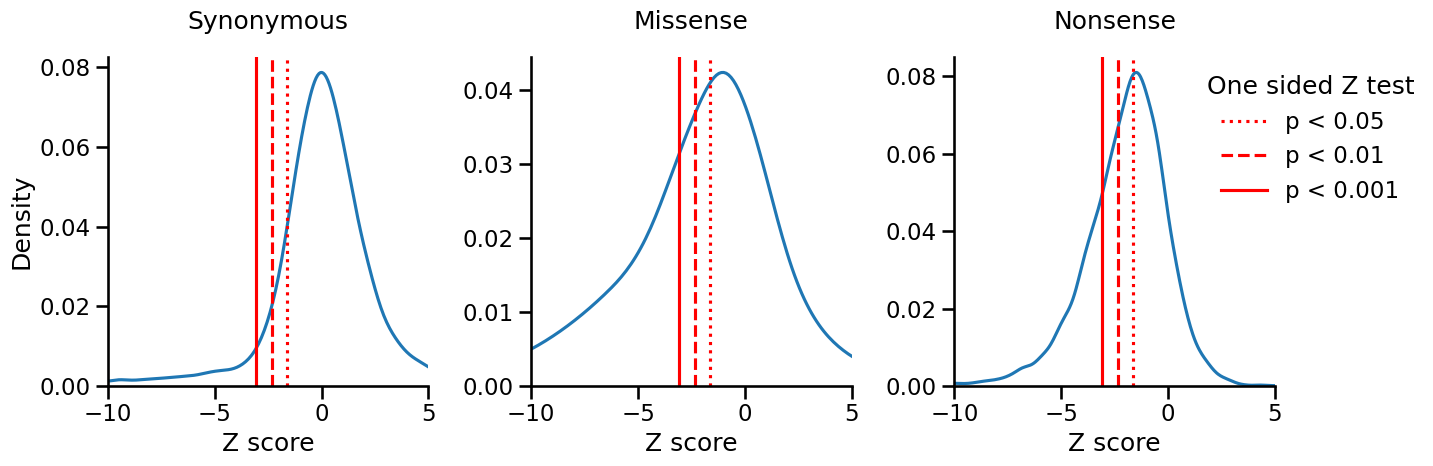

In [7]:
sns.set_context("talk")

csq = ["synonymous", "missense", "nonsense"]

g = sns.displot(
    kind="kde",
    data=df[df.region == "transcript"],
    x="z",
    col="csq",
    col_order=csq,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-10, 5),
)

for ax, c in zip(g.axes[0], [c.capitalize() for c in csq]):
    ax.set_title(c, pad=20)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")
plt.legend(
    title="One sided Z test",
    loc="center right",
    bbox_to_anchor=(1.5, 0.75),
    frameon=False,
)
plt.tight_layout()

plt.savefig("../plots/constraint_z_in_transcripts_by_csq.svg", format="svg")

## O/E per transcript

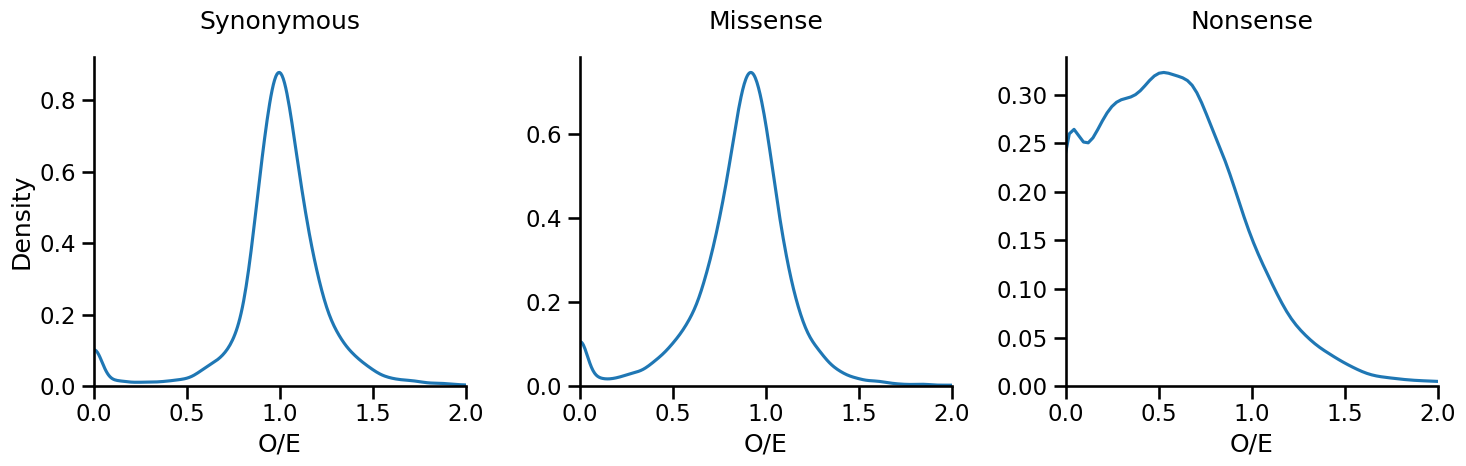

In [8]:
sns.set_context("talk")

csq = ["synonymous", "missense", "nonsense"]

g = sns.displot(
    kind="kde",
    data=df[df.region == "transcript"],
    x=df["n_obs"] / df["n_exp"],
    col="csq",
    col_order=csq,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="O/E",
    xlim=(0, 2),
)

for ax, c in zip(g.axes[0], [c.capitalize() for c in csq]):
    ax.set_title(c, pad=20)

plt.tight_layout()
plt.savefig("../plots/constraint_oe_in_transcripts_by_csq.svg", format="svg")

## Nonsense Z score by region

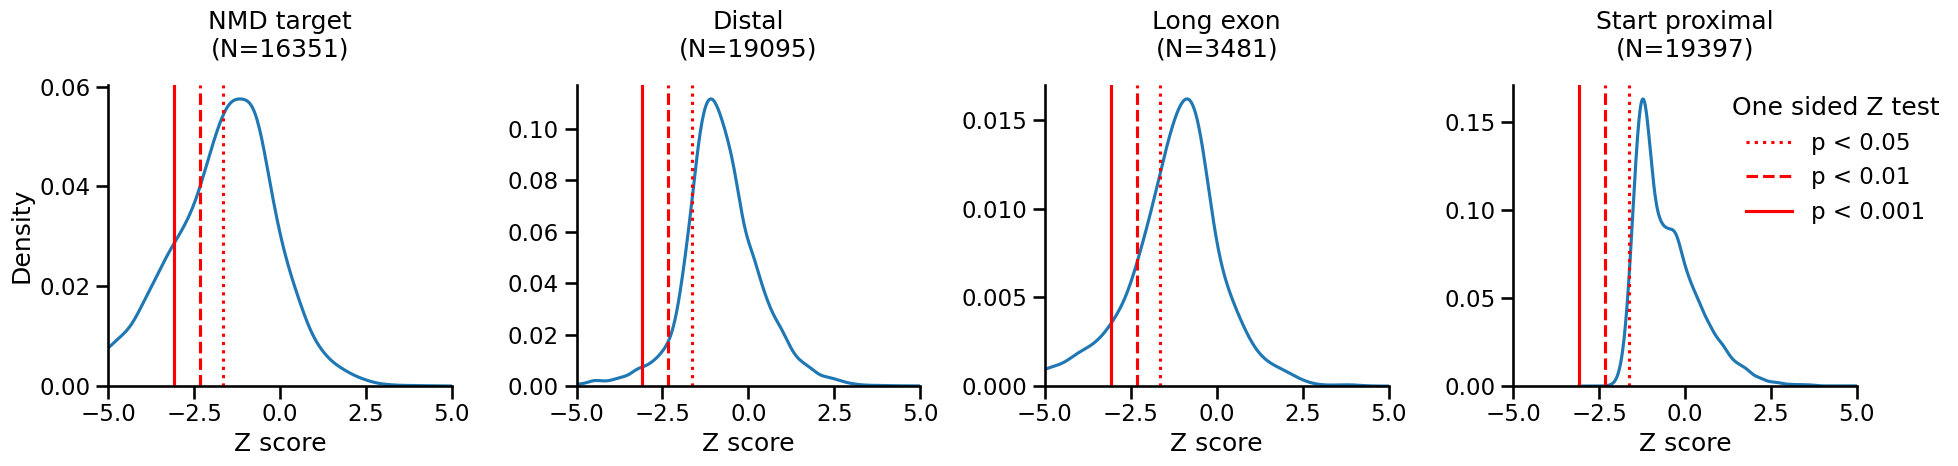

In [9]:
sns.set_context("talk")

regions = ["nmd_target", "distal_nmd", "long_exon", "start_proximal"]
regions_title = ["NMD target", "Distal", "Long exon", "Start proximal"]
count = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "z"].count() for r in regions
]

g = sns.displot(
    kind="kde",
    data=df[df.csq == "nonsense"],
    x="z",
    col="region",
    col_order=regions,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-5, 5),
)

for ax, r, n in zip(g.axes[0], [r for r in regions_title], count):
    ax.set_title(f"{r}\n(N={n})", pad=20)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")

plt.legend(
    title="One sided Z test",
    loc="center right",
    bbox_to_anchor=(1.3, 0.75),
    frameon=False,
)
plt.tight_layout()
plt.savefig("../plots/constraint_z_in_regions_nonsense.svg", format="svg")

## Nonsense P values by region, before and after FDR correction

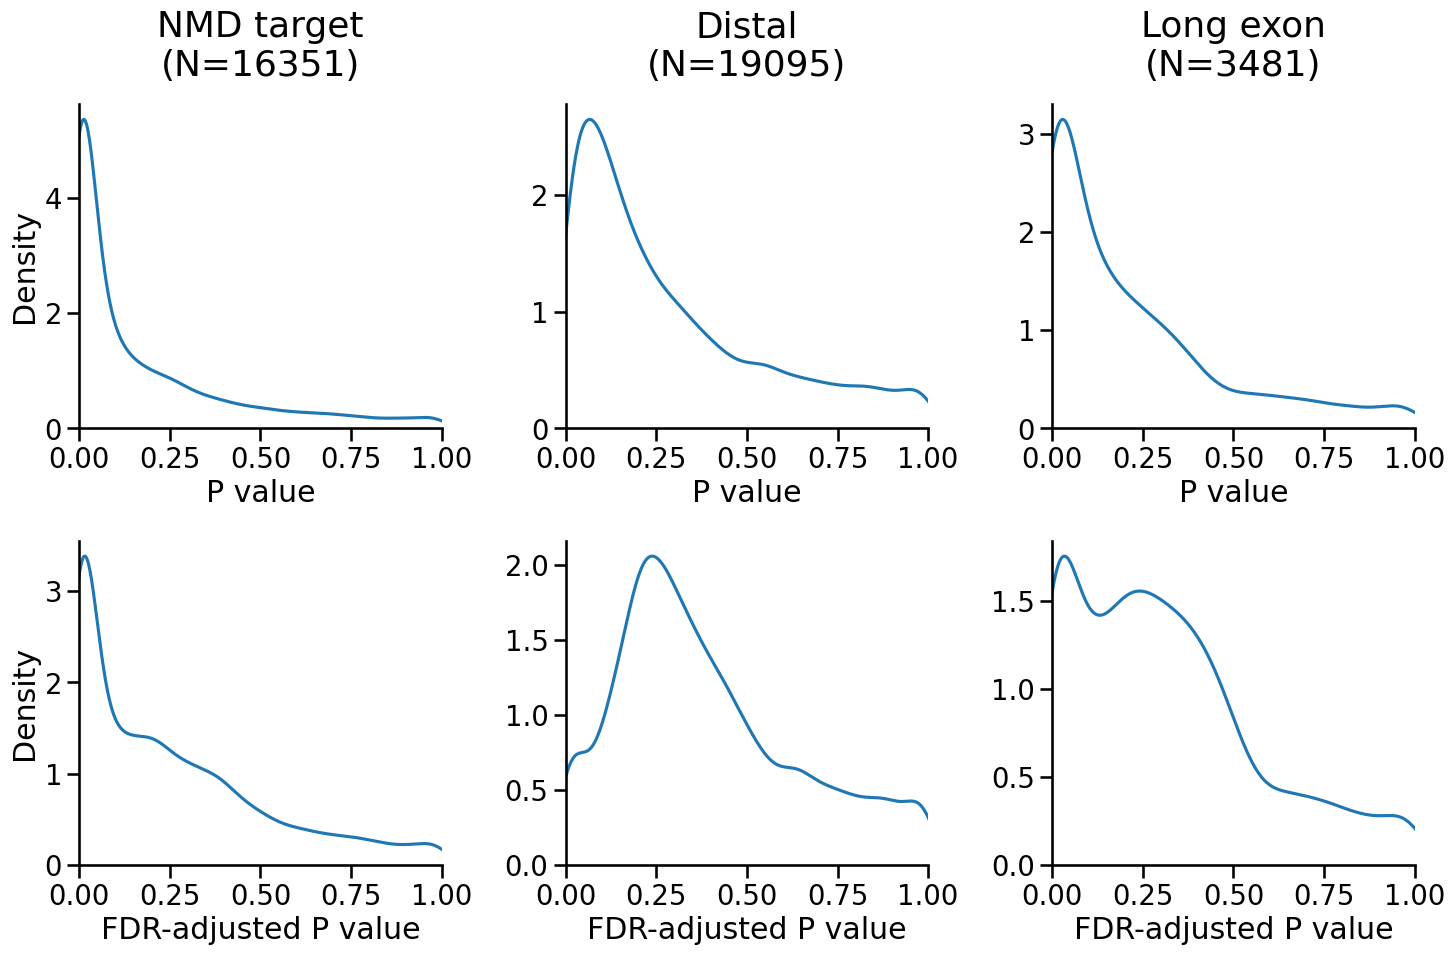

In [25]:
sns.set_context("talk", font_scale=1.2)

regions = ["nmd_target", "distal_nmd", "long_exon"]
regions_title = ["NMD target", "Distal", "Long exon"]
number = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "p"].count() for r in regions
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10), layout="tight")

# Raw P values
for r, rt, n, (i, ax) in zip(regions, regions_title, number, enumerate(axs[0])):
    sns.kdeplot(
        ax=ax,
        data=df[(df.csq == "nonsense") & (df["region"] == r)],
        x="p",
        gridsize=1000,
    )
    ax.set_xlim(0,1)
    ax.set_xlabel("P value")
    ax.set_title(f"{rt}\n(N={n})", pad=20, fontsize="large")
    
    if i == 0: ax.set_ylabel("Density")
    else: ax.set_ylabel(None)

# FDR-adjusted P values
for r, rt, n, (i, ax) in zip(regions, regions_title, number, enumerate(axs[1])):
    sns.kdeplot(
        ax=ax,
        data=df[(df.csq == "nonsense") & (df["region"] == r)],
        x="fdr_p",
        gridsize=1000,
    )
    ax.set_xlim(0,1)
    ax.set_xlabel("FDR-adjusted P value")

    if i == 0: ax.set_ylabel("Density")
    else: ax.set_ylabel(None)
    
# Figure level changes
for ax in axs:
    for a in ax:
        a.spines["top"].set_color("None")
        a.spines["right"].set_color("None")
    
plt.savefig("../plots/constraint_p_in_regions_combined.svg", format="svg")

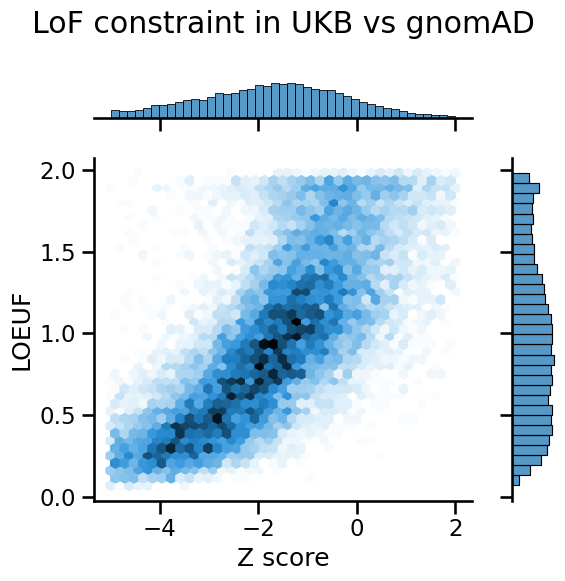

In [30]:
sns.set_context("talk", font_scale=1)

g = sns.jointplot(
    data=df[(df["csq"]=="nonsense") & (df["z"].between(-5, 2)) & (df["region"]=="transcript")],
    x=("z"),
    y="loeuf",
    kind="hex",
)
g.set_axis_labels(
    xlabel="Z score",
    ylabel="LOEUF",
)
g.fig.suptitle("LoF constraint in UKB vs gnomAD")
g.fig.tight_layout()
